In [25]:
pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from tensorflow import keras


In [27]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.12.0
Keras version: 2.12.0


# New Section

In [28]:
import pandas as pd
wine_data = pd.read_csv('/content/sample_data/wine.csv')

In [29]:
# Explore the dimensions of the dataset
print("Number of rows:", wine_data.shape[0])
print("Number of columns:", wine_data.shape[1])

Number of rows: 1599
Number of columns: 12


In [30]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [31]:
# Check for null values
null_values = wine_data.isnull().sum()
print("Null values:\n", null_values)

Null values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [32]:
# Identify categorical variables
categorical_vars = wine_data.select_dtypes(include=['object']).columns
print("Categorical variables:\n", categorical_vars)


Categorical variables:
 Index(['quality'], dtype='object')


In [33]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
label_encoder = LabelEncoder()
for var in categorical_vars:
    wine_data[var] = label_encoder.fit_transform(wine_data[var])

In [34]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [35]:
features = wine_data.drop('quality', axis=1)  # Drop the 'quality' column to get the features
target = wine_data['quality']  # Assign the 'quality' column as the target variable


In [36]:
print("Features:\n", features.head())


Features:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [37]:
print("\nTarget:\n", target.head())



Target:
 0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64


In [38]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [39]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Further split the training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Print the sizes of the datasets
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 959
Validation set size: 320
Test set size: 320


In [40]:
from sklearn.preprocessing import StandardScaler

# Perform standardization on the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Print the scaled features
scaled_features_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='logs', histogram_freq=1)
# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(None, X_train.shape[1])))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/10
30/30 [==============================] - 2s 18ms/step - loss: 1.0063 - accuracy: 0.5558 - val_loss: 0.6962 - val_accuracy: 0.5938
Epoch 2/10
30/30 [==============================] - 0s 9ms/step - loss: 0.6581 - accuracy: 0.6288 - val_loss: 0.7100 - val_accuracy: 0.5750
Epoch 3/10
30/30 [==============================] - 0s 9ms/step - loss: 0.6469 - accuracy: 0.6246 - val_loss: 0.6499 - val_accuracy: 0.6156
Epoch 4/10
30/30 [==============================] - 0s 8ms/step - loss: 0.6361 - accuracy: 0.6423 - val_loss: 0.6640 - val_accuracy: 0.6031
Epoch 5/10
30/30 [==============================] - 0s 9ms/step - loss: 0.6298 - accuracy: 0.6382 - val_loss: 0.6531 - val_accuracy: 0.6094
Epoch 6/10
30/30 [==============================] - 0s 8ms/step - loss: 0.6274 - accuracy: 0.6403 - val_loss: 0.6547 - val_accuracy: 0.6031
Epoch 7/10
30/30 [==============================] - 0s 9ms/step - loss: 0.6199 - accuracy: 0.6434 - val_loss: 0.6394 - val_accuracy: 0.6125
Epoch 8/10
30/30 [=

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)
# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
30/30 [==============================] - 0s 10ms/step - loss: 0.6122 - accuracy: 0.6580 - val_loss: 0.6344 - val_accuracy: 0.6344
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 0.5970 - accuracy: 0.6455 - val_loss: 0.6184 - val_accuracy: 0.6250
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6024 - accuracy: 0.6726 - val_loss: 0.6192 - val_accuracy: 0.6344
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 0.5948 - accuracy: 0.6517 - val_loss: 0.6132 - val_accuracy: 0.6313
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 0.5805 - accuracy: 0.6872 - val_loss: 0.6283 - val_accuracy: 0.6125
Epoch 6/100
30/30 [==============================] - 0s 5ms/step - loss: 0.5808 - accuracy: 0.6778 - val_loss: 0.6046 - val_accuracy: 0.6656
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 0.5824 - accuracy: 0.6694 - val_loss: 0.6200 - val_accuracy: 0.6281
Epoch 8/100


In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Define the model checkpoint callback
checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the model checkpoint callback
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[checkpoint_callback])

Epoch 1/10
27/30 [==========================>...] - ETA: 0s - loss: 0.5265 - accuracy: 0.7245 
Epoch 1: val_accuracy improved from -inf to 0.71875, saving model to best_model.h5
30/30 [==============================] - 1s 11ms/step - loss: 0.5264 - accuracy: 0.7226 - val_loss: 0.5822 - val_accuracy: 0.7188
Epoch 2/10
20/30 [===================>..........] - ETA: 0s - loss: 0.5435 - accuracy: 0.7250
Epoch 2: val_accuracy improved from 0.71875 to 0.72812, saving model to best_model.h5
30/30 [==============================] - 0s 5ms/step - loss: 0.5216 - accuracy: 0.7466 - val_loss: 0.5706 - val_accuracy: 0.7281
Epoch 3/10
26/30 [=========================>....] - ETA: 0s - loss: 0.5227 - accuracy: 0.7440
Epoch 3: val_accuracy did not improve from 0.72812
30/30 [==============================] - 0s 4ms/step - loss: 0.5278 - accuracy: 0.7414 - val_loss: 0.5638 - val_accuracy: 0.7219
Epoch 4/10
25/30 [========================>.....] - ETA: 0s - loss: 0.5422 - accuracy: 0.7138
Epoch 4: val_ac

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, None, 64)          768       
                                                                 
 dense_4 (Dense)             (None, None, 32)          2080      
                                                                 
 dense_5 (Dense)             (None, None, 1)           33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_weights = model.get_weights()
print("Weights of the first layer:")
#model_weights[0] # Assumes the first element in the list corresponds to the weights of the first layer


Weights of the first layer:


In [52]:


# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
history
# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)


Epoch 1/10
30/30 [==============================] - 0s 5ms/step - loss: 0.5125 - accuracy: 0.7508 - val_loss: 0.5870 - val_accuracy: 0.7250
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 0.5124 - accuracy: 0.7393 - val_loss: 0.5571 - val_accuracy: 0.7250
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.5057 - accuracy: 0.7550 - val_loss: 0.5600 - val_accuracy: 0.7437
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.7497 - val_loss: 0.6777 - val_accuracy: 0.6375
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 0.5379 - accuracy: 0.7237 - val_loss: 0.5934 - val_accuracy: 0.7063
Epoch 6/10
30/30 [==============================] - 0s 4ms/step - loss: 0.5053 - accuracy: 0.7477 - val_loss: 0.5826 - val_accuracy: 0.7156
Epoch 7/10
30/30 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.7372 - val_loss: 0.5542 - val_accuracy: 0.7312
Epoch 8/10
30/30 [==

In [56]:
history.history

{'loss': [0.5125002861022949,
  0.5124305486679077,
  0.5056694149971008,
  0.500568151473999,
  0.5378966331481934,
  0.5053340792655945,
  0.508173942565918,
  0.5049203038215637,
  0.5049923062324524,
  0.5102009773254395],
 'accuracy': [0.7507820725440979,
  0.7393117547035217,
  0.7549530863761902,
  0.7497392892837524,
  0.723670482635498,
  0.7476537823677063,
  0.7372262477874756,
  0.7445255517959595,
  0.738269031047821,
  0.7351408004760742],
 'val_loss': [0.586952805519104,
  0.5570629239082336,
  0.5599565505981445,
  0.6776704788208008,
  0.5934125781059265,
  0.5825806260108948,
  0.5542243719100952,
  0.5589854717254639,
  0.5577568411827087,
  0.5743976831436157],
 'val_accuracy': [0.7250000238418579,
  0.7250000238418579,
  0.7437499761581421,
  0.637499988079071,
  0.706250011920929,
  0.715624988079071,
  0.731249988079071,
  0.7406250238418579,
  0.734375,
  0.71875]}

In [57]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.511372,0.738269,0.569444,0.728125
1,0.514990,0.742440,0.562510,0.718750
2,0.518838,0.747654,0.584285,0.703125
3,0.517446,0.738269,0.560215,0.725000
4,0.505553,0.745568,0.552708,0.734375
5,0.516378,0.743483,0.574461,0.743750
6,0.506670,0.747654,0.572652,0.740625
7,0.526062,0.721585,0.598351,0.706250
8,0.512248,0.741397,0.565571,0.740625
9,0.515777,0.722628,0.569471,0.737500


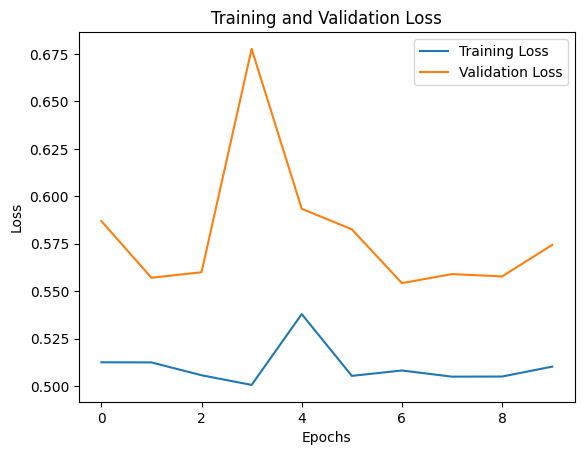

In [59]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




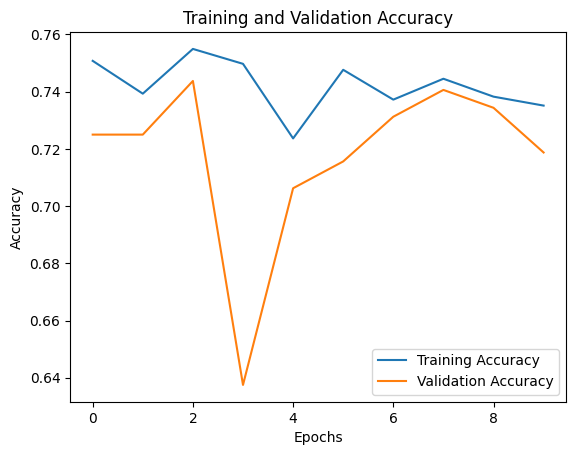

In [60]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [61]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


10/10 [==============================] - 0s 5ms/step - loss: 0.5282 - accuracy: 0.7125
Test Loss: 0.5281667113304138
Test Accuracy: 0.7124999761581421
